In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from c19_load import load_multiple_countries

In [2]:
ASEAN_COUNTRIES = ['Singapore', 'Thailand', 'Malaysia', 'Indonesia', 'Vietnam', 'Cambodia', 'Philippines', 'Brunei']
df = load_multiple_countries(ASEAN_COUNTRIES)

LAST_DAYS = 30
Y_SIZE = 500

annotate_kwargs = dict(
    s='Based on COVID Data Repository by Johns Hopkins CSSE \nbryan.blackbee', 
    xy=(0.05, 0.00), xycoords='figure fraction', fontsize=10)

In [3]:
display(df)

,country,date,total,new,deaths,discharged,active
0,Singapore,2020-01-22,0,0,0,0,0
1,Singapore,2020-01-23,1,1,0,0,1
2,Singapore,2020-01-24,3,2,0,0,3
3,Singapore,2020-01-25,3,0,0,0,3
4,Singapore,2020-01-26,4,1,0,0,4
...,...,...,...,...,...,...,...
595,Brunei,2020-04-01,131,2,1,52,78
596,Brunei,2020-04-02,133,2,1,56,76
597,Brunei,2020-04-03,134,1,1,65,68
598,Brunei,2020-04-04,135,1,1,66,68


In [4]:
# 2nd graph, used for highlighting WHO declaring pandaemic
x = np.arange(df.shape[0])
df2 = pd.DataFrame({'x' : x, 'y' : 0})

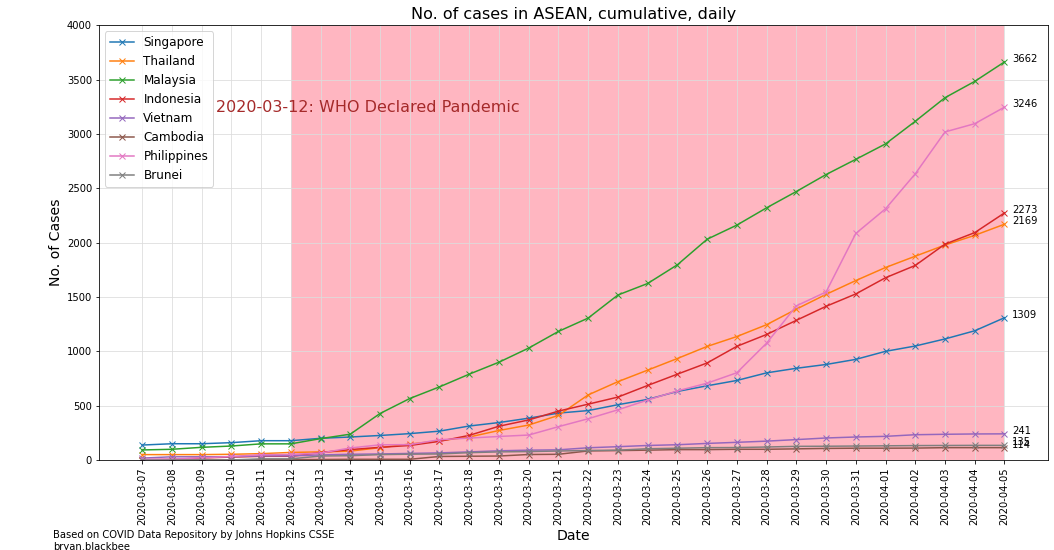

In [5]:
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(1,1,1)

# Used for determination of values of axes
countries = []
todayscases = []

# Plot
for c in ASEAN_COUNTRIES:
    # Plot
    df_d = df[df.country==c].copy()
    df_d.tail(LAST_DAYS).plot(kind='line', x='date', y='total', ax=ax, marker='x', linewidth=1.5)
    # Collect data
    countries.append(c)
    todayscases.append(df_d['total'].tail(1).tolist()[0])

# x-axis
ax.set_xticks(range(LAST_DAYS))
ax.set_xticklabels(df['date'].tail(LAST_DAYS), rotation=90)
ax.set_xlabel("Date", fontsize=14)

# y-axis
todayscases_max = max(todayscases)
ylim_max = (todayscases_max//Y_SIZE + 1)*Y_SIZE
ax.set_ylim(0, ylim_max)
ax.set_yticks(range(0,ylim_max+1,Y_SIZE))
ax.set_ylabel("No. of Cases", fontsize=14)

# features of graph
ax.grid(color='GAINSBORO')
ax.legend(countries, fontsize=12)

# no. of cases annotation
for i, v in enumerate(todayscases):
    ax.text(df_d.tail(LAST_DAYS).shape[0]-0.75, v, str(v), fontsize=10)

# title
ax.set_title("No. of cases in ASEAN, cumulative, daily", fontsize=16)

# WHO Declares Pandemic
df_t = df.tail(LAST_DAYS).copy()
_ = df_t.reset_index(inplace=True, drop=True)
pdm_start_index = df_t[df_t.date=='2020-03-12'].index[0]
ax.fill_between([pdm_start_index,df_t.index.max()], 0, ylim_max, facecolor='LIGHTPINK')
ax.text(pdm_start_index*0.5, ylim_max*0.80,"2020-03-12: WHO Declared Pandemic", fontsize=16, color="BROWN")

ax.annotate(**annotate_kwargs)

plt.show()

In [6]:
pivot_raw = df[(df.country.isin(ASEAN_COUNTRIES)) & (df.date.isin(df['date'].unique()[-int(LAST_DAYS/3):]))][['country', 'date', 'total']]
pivot_raw = pivot_raw.copy()
pd.pivot_table(pivot_raw, columns=['date'], index='country')

total                                                         \
date        2020-03-27 2020-03-28 2020-03-29 2020-03-30 2020-03-31 2020-04-01   
country                                                                         
Brunei             115        120        126        127        129        131   
Cambodia            99         99        103        107        109        109   
Indonesia         1046       1155       1285       1414       1528       1677   
Malaysia          2161       2320       2470       2626       2766       2908   
Philippines        803       1075       1418       1546       2084       2311   
Singapore          732        802        844        879        926       1000   
Thailand          1136       1245       1388       1524       1651       1771   
Vietnam            163        174        188        203        212        218   

                                                         
date        2020-04-02 2020-04-03 2020-04-04 2020-04-05  
country                                                  
Brunei             133        134        135        135  
Cambodia           110        114        114        114  
Indonesia         1790       1986       2092       2273  
Malaysia          3116       3333       3483       3662  
Philippines       2633       3018       3094       3246  
Singapore         1049       1114       1189       1309  
Thailand          1875       1978       2067       2169  
Vietnam            233        237        240        241

Sources: 

[COVID-19 outbreak 'a pandemic': WHO chief](https://www.channelnewsasia.com/news/world/covid-19-coronavirus-pandemic-who-chief-12528328)